In [243]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [244]:
img = cv2.imread(r"C:\Users\BARTU\Desktop\images\digital_sp_line1.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #grayscaling

denoised = cv2.fastNlMeansDenoising(gray,None,20,7,21)

#Thresholding, to convert a grayscale image to a binary image.
thresh = cv2.threshold(denoised, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

cv2.MORPH_OPEN, erosion followed by dilation.
(25, 1), 25px wide 1px tall

In [246]:
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 1))
detect_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=1)
subtracted = cv2.subtract(thresh, detect_horizontal)

vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 6))
dilated = cv2.morphologyEx(subtracted, cv2.MORPH_DILATE, vertical_kernel, iterations=1)

kernel = np.ones((3,3), np.uint8)
result = cv2.morphologyEx(dilated, cv2.MORPH_ERODE, kernel, iterations=1)

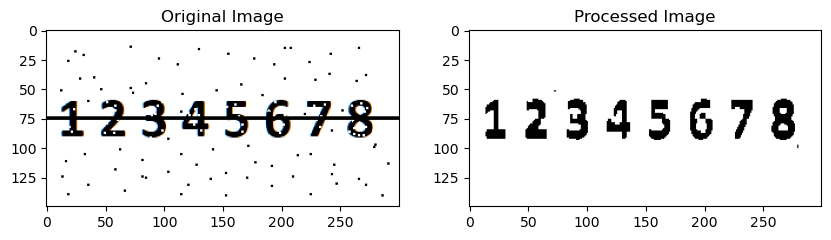

In [247]:
bitwise_result = cv2.bitwise_not(result)
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(bitwise_result, cmap='gray')
plt.title('Processed Image')

plt.show()

In [248]:
contours, hierarchy = cv2.findContours(result, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print ("Number of contours detected = %d" % len(contours))

min_height = 10
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if h > min_height:
        cv2.rectangle(img,(x,y),(x+w,y+h+1),(0,255,0),2)

Number of contours detected = 10


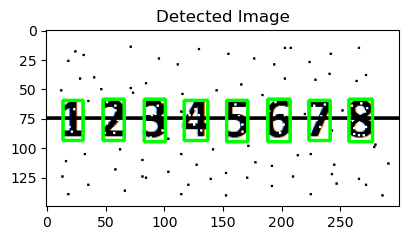

In [249]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Detected Image')


plt.show()